### 数据可视化
1. 更好的理解数据
2. 是否能够根据可视化结果构建新的特征

In [2]:
# 1. 连续单变量的数据可视化
# 可以理解数据的分布和奇异值情况
# 通过观察bins，切分数据，并做one-hot编码
sns.distplot

NameError: name 'sns' is not defined

In [21]:
-------------------------------------------------------------------------------------------

In [4]:
# 2. 类别标签 + 类别/数值
# https://blog.csdn.net/u013317445/article/details/88196373
# 总结1 : swarm / bar / violin
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = 'C:/ZhangLI/Codes/DataSet/titanic/'
gender_data = pd.read_csv(path + 'gender_submission.csv')
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')

In [6]:
train_data.columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
sns.catplot(x="Survived", y="Age", data=train_data) # 默认为strip， jitter可以调整点的波动

In [11]:
# 适合小数据量画图
# swarm 蜂窝图
# 顺序会自动判断
sns.catplot(x='Survived', y='Fare', data=train_data, kind='swarm') # swarm 蜂窝图
sns.catplot(x='Survived', y='Fare', hue='Sex', data=train_data, kind='swarm') # hue 对数据增加颜色
sns.catplot(x='Survived', y='Fare', hue='Sex', order=[1, 0], data=train_data, kind='swarm') # order可以指定顺序

In [20]:
# 分类分布图
sns.catplot(x='Survived', y='Fare', data=train_data, kind='box') # 离群点、上界、上四分位数、均值、中位数、下四分位数、下界、离群点
sns.catplot(x='Survived', y='Fare', hue='Sex', data=train_data, kind='box') # 生存的男性的票价，女性的票价分布
train_data['Sex_new'] = train_data['Sex'].isin(['lgbt'])
sns.catplot(x='Survived', y='Fare', hue='Sex_new', dodge=False, data=train_data, kind='box')  # hue只有一个参数，所以将dodge=False

sns.catplot(x='Survived', y='Fare', data=train_data, kind='boxen') # 对大数据更加友好

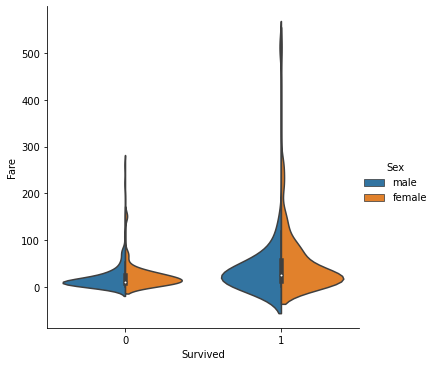

In [24]:
# 小提琴图
# 它将箱线图和核密度估计(kde: kernel density estimation)结合起来
sns.catplot(x='Survived', y='Fare', hue='Sex', split=True, data=train_data, kind='violin') # 当hue只有两类是，split可以设置为True

(64, 13)
(9, 13)
----- 0.8767123287671232
(140, 13)
(63, 13)
(27, 13)
(9, 13)
(29, 13)
(66, 13)
(77, 13)
(364, 13)
(3, 13)
(38, 13)


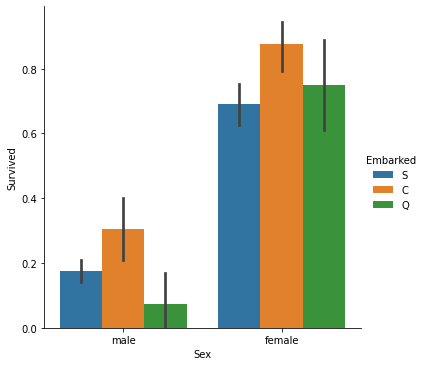

In [54]:
# 分类统计估计图
# 条形图
# 统计 男性中 C类座位 生还人数 / 男性中 c类座位 总人数
sns.catplot(kind="bar", x="Sex", y="Survived", hue="Embarked", data=train_data)

m = train_data[(train_data['Embarked']=='C') & (train_data['Sex']=='female')]
n = train_data[(train_data['Embarked']=='S') & (train_data['Sex']=='female')]
l = train_data[(train_data['Embarked']=='Q') & (train_data['Sex']=='female')]
print(m[m['Survived']==1].shape)
print(m[m['Survived']==0].shape)
print('-----', m[m['Survived']==1].shape[0]/m.shape[0])

print(n[n['Survived']==1].shape)
print(n[n['Survived']==0].shape)

print(l[l['Survived']==1].shape)
print(l[l['Survived']==0].shape)

p = train_data[(train_data['Embarked']=='C') & (train_data['Sex']=='male')]
q = train_data[(train_data['Embarked']=='S') & (train_data['Sex']=='male')]
r = train_data[(train_data['Embarked']=='Q') & (train_data['Sex']=='male')]
print(p[p['Survived']==1].shape)
print(p[p['Survived']==0].shape)

print(q[q['Survived']==1].shape)
print(q[q['Survived']==0].shape)

print(r[r['Survived']==1].shape)
print(r[r['Survived']==0].shape)

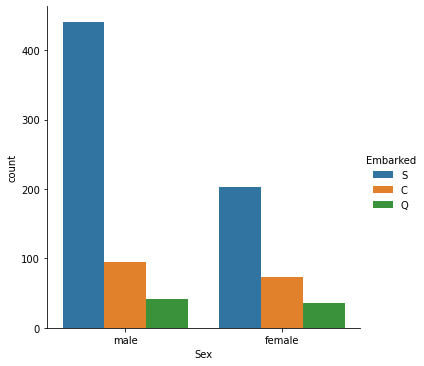

In [58]:
# 观测量图
# 只有一个轴， 要不x, 要不y 
# 感觉只作为统计用可以，效果不明显
sns.catplot(kind="count", x="Sex", data=train_data)
sns.catplot(kind="count", x="Sex",  hue="Embarked", data=train_data)

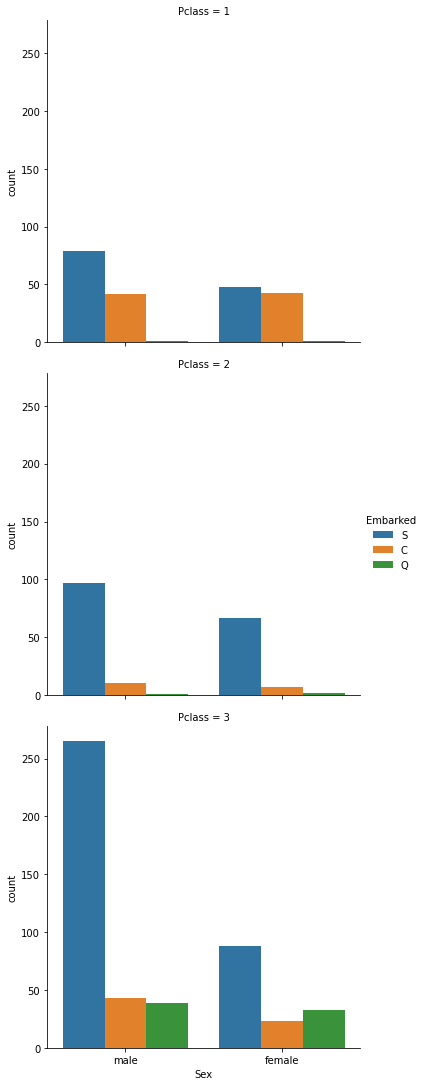

In [60]:
# row、col 展示多重关系
sns.catplot(kind="count", x="Sex", hue="Embarked", col='Pclass', data=train_data)
sns.catplot(kind="count", x="Sex", hue="Embarked", row='Pclass', data=train_data)

# 一、类别特征和连续特征可视化

## 1、连续变量可视化
1. show_feature_use_kde

## 2、类别变量可视化
1. show_feature_use_box
2. show_feature_use_count

## 3、连续性变量+类型型标签
1. show_con_feature_under_label

## 4、类别型变量+类别型标签
1. show_cate_feature_under_label

In [2]:
cont_cols = ['age','n3m_fact_fee', 'n3m_avg_call_fee', 'n3m_fav_fee', 'n3m_pay_fee','tot_flow_used','tot_flow_rate','total_flow',
             'dou_overfee','mou_overfee','lm_dou_overfee','lm_mou_overfee','l2m_dou_overfee','l2m_mou_overfee']
cate_cols = ['sex_new', 'vip_flag','os_cnt', 'os_days', 'l_os_cnt', 'l_os_days', 'll_os_cnt', 'll_os_days',
            'pay_active_cnts', 
            'dou_overfee_lable','mou_overfee_lable','lm_dou_overfee_lable','lm_mou_overfee_lable','l2m_dou_overfee_lable','l2m_mou_overfee_lable',
            'cpl_cnt','veido_cpl_cnt','band_cpl_cnt','fee_cpl_cnt',]
# 连续变量
def show_feature_use_kde(dataframe, features=[]):
    """连续变量"""
    plt.clf()
    fcols = 5
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.kdeplot(x=dataframe[col], shade=True)
    plt.show()
# show_feature_use_kde(train_data, cont_cols)

<Figure size 432x288 with 0 Axes>

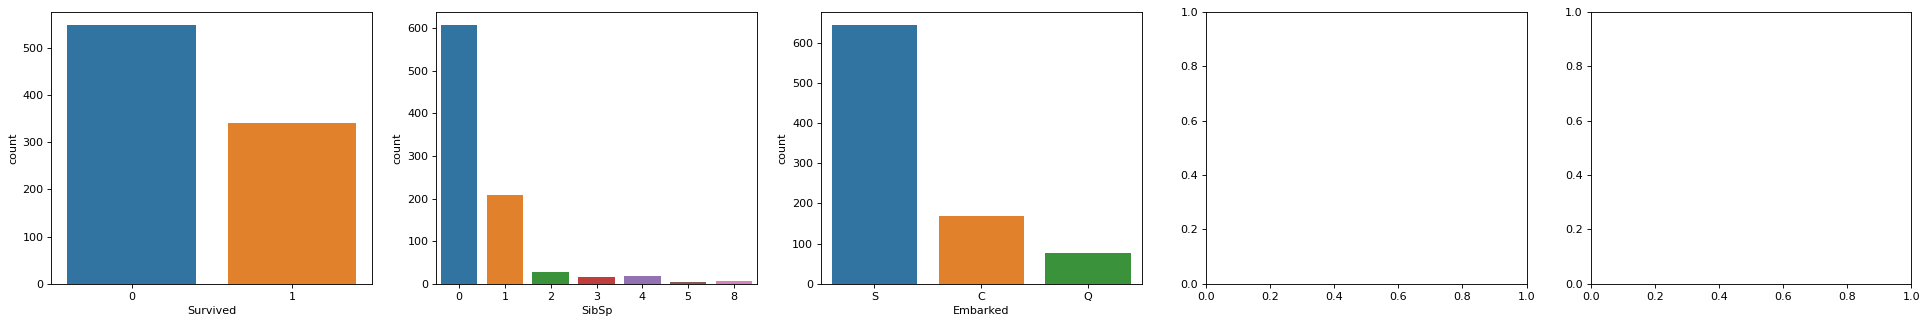

In [16]:
# 类型性变量
def show_feature_use_box(dataframe, features=[]):
    """连续变量"""
    plt.clf()
    fcols = 5
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.boxplot(y=dataframe[col], orient="h")
    plt.show()
# show_feature_use_box(train_data, cont_cols)

# 类型变量
cate_cols = ['Survived','SibSp','Embarked']
def show_feature_use_count(dataframe, features=['sex_new']):
    """类别变量"""
    plt.clf()
    fcols = 5
    frows = len(features)
#     plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    fig, axes = plt.subplots(frows//fcols+1, fcols, figsize=(6*fcols, frows*1.5), dpi=80)
    for col in features:
        i += 1
        sns.countplot(x=dataframe[col], ax=axes[i-1])
    plt.show()
show_feature_use_count(train_data, cate_cols)

# 类别标签+类型变量
def show_feature_use_count(dataframe, features=['sex_new']):
    """类别变量"""
    plt.clf()
    fcols = 5
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.countplot(x=col, hue=label, data=dataframe)
    plt.show()
# show_feature_use_count(train_data, cate_cols)
  

In [1]:
# 标签和连续变量
def show_con_feature_under_label(dataframe, features=[], label='label'):
    """连续变量"""
    label_1 = dataframe[label] == 1
    label_0 = dataframe[label] == 0
    plt.clf()
    fcols = 4
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.kdeplot(dataframe[col][label_1], color="Blue", shade=True, label='不满意')
        sns.kdeplot(dataframe[col][label_0], color="Red", shade=True, label='满意')
        # sns.displot(data=dataframe, x=col, hue=label, kind='kde')
    plt.show()
show_con_feature_under_label(train_data, cont_cols, 'label')


In [ ]:
# 标签和类型变量
def show_cate_feature_under_label(dataframe, features=[], label='label'):
    """类别变量与label"""
    sns.set_style(style=None, rc=None)
    fcols = 4
    frows = len(features)
    plt.figure(figsize=(6*fcols, frows*1.5))
    i = 0
    for col in features:
        i += 1
        plt.subplot(frows//fcols+1, fcols, i)
        sns.catplot(kind="count", x=col, hue=label, data=train_data)
    plt.show()
show_cate_feature_under_label(train_data, cate_cols, 'label')

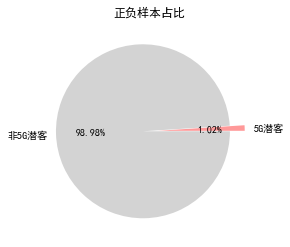

In [25]:
import matplotlib.pyplot as plt
def show_pie():
    plt.rcParams['font.sans-serif']=['SimHei']
    colors=['#ff9999','lightgrey']  # 自定义颜色
    plt.pie(x = [491475,47757205],
           explode=[0.1,0.07],
           labels=['5G潜客','非5G潜客'],
           colors=colors,
           autopct='%.2f%%')
    plt.title('正负样本占比')
show_pie()